# **Please note that some of the visualizations are Interactive** <br>
**so you can move it around, select specific regions, or even explore the map to gian more insights on the dataset <br>
Have fun ♥**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df=pd.read_csv('/content/world-happiness-report-2021.csv')
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [4]:
# Drop unnecessary columns
drop_cols = [
    'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
    'Ladder score in Dystopia', 'Explained by: Log GDP per capita',
    'Explained by: Social support', 'Explained by: Healthy life expectancy',
    'Explained by: Freedom to make life choices', 'Explained by: Generosity',
    'Explained by: Perceptions of corruption', 'Dystopia + residual'
]

df.drop(columns=drop_cols, inplace=True)

df.rename(columns={
    "Country name": "Country",
    "Regional indicator": "Region",
    "Ladder score": "Happiness",
    "Logged GDP per capita": "GDP",
    "Healthy life expectancy": "Life_Expectancy",
    "Freedom to make life choices": "Freedom",
    "Perceptions of corruption": "Corruption"
}, inplace=True)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          149 non-null    object 
 1   Region           149 non-null    object 
 2   Happiness        149 non-null    float64
 3   GDP              149 non-null    float64
 4   Social support   149 non-null    float64
 5   Life_Expectancy  149 non-null    float64
 6   Freedom          149 non-null    float64
 7   Generosity       149 non-null    float64
 8   Corruption       149 non-null    float64
dtypes: float64(7), object(2)
memory usage: 10.6+ KB


In [6]:
df.describe()

,Happiness,GDP,Social support,Life_Expectancy,Freedom,Generosity,Corruption
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000


In [7]:
df.isnull().sum()

,0
Country,0
Region,0
Happiness,0
GDP,0
Social support,0
Life_Expectancy,0
Freedom,0
Generosity,0
Corruption,0


# Univariate Analysis

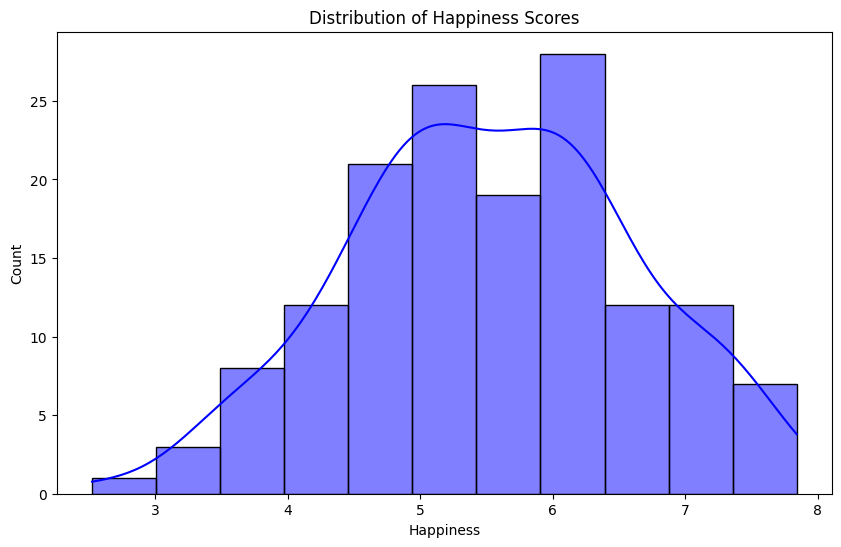

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Happiness'], kde=True, color='blue')
plt.title("Distribution of Happiness Scores")
plt.show()

/tmp/ipython-input-1951905038.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Happiness', y='Country', data=top_10, palette='viridis')


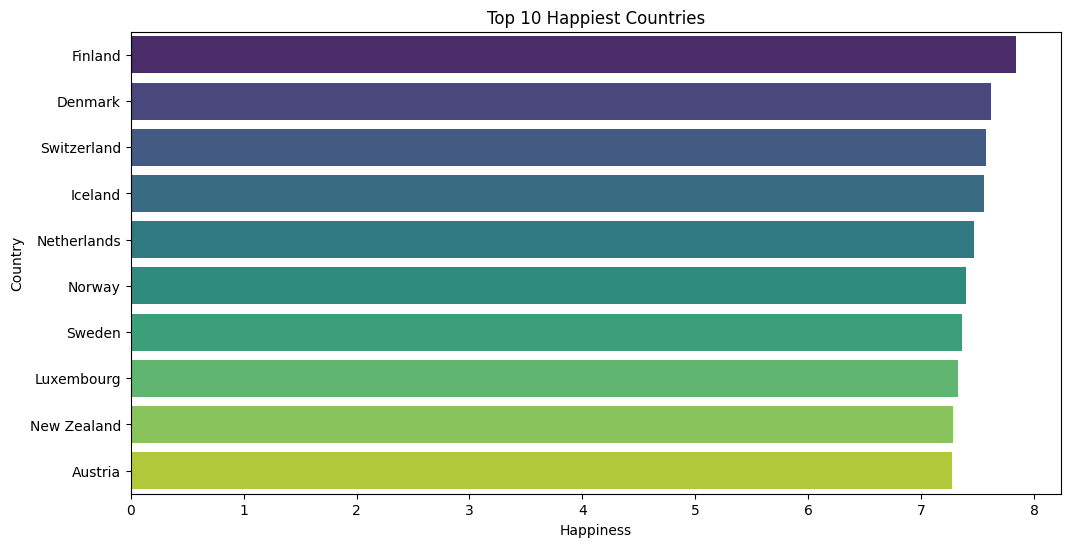

/tmp/ipython-input-1951905038.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Happiness', y='Country', data=bottom_10, palette='magma')


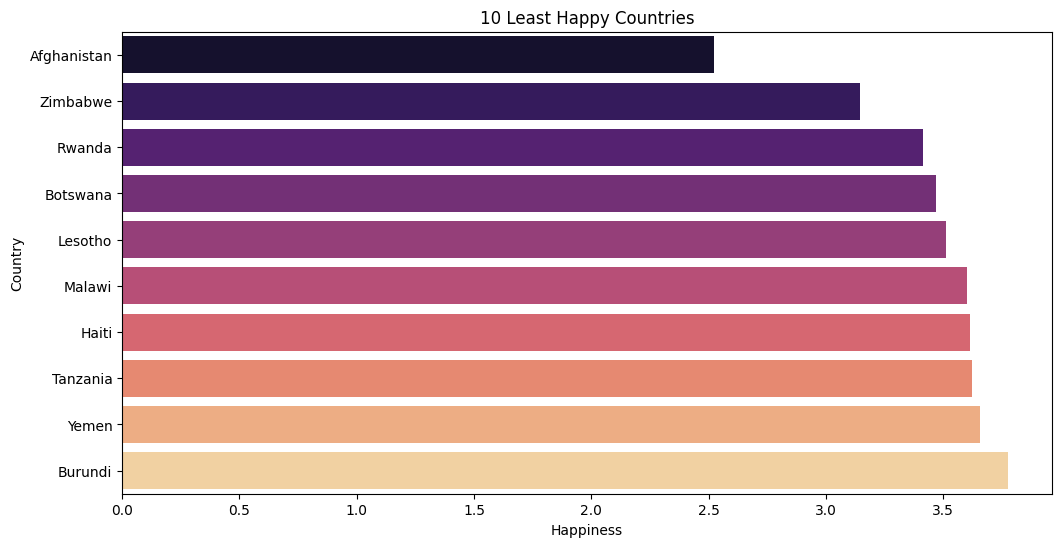

In [9]:
# Top 10 happiest
top_10 = df.sort_values('Happiness', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Happiness', y='Country', data=top_10, palette='viridis')
plt.title("Top 10 Happiest Countries")
plt.show()

# Bottom 10
bottom_10 = df.sort_values('Happiness').head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Happiness', y='Country', data=bottom_10, palette='magma')
plt.title("10 Least Happy Countries")
plt.show()

# Bivariate Analysis

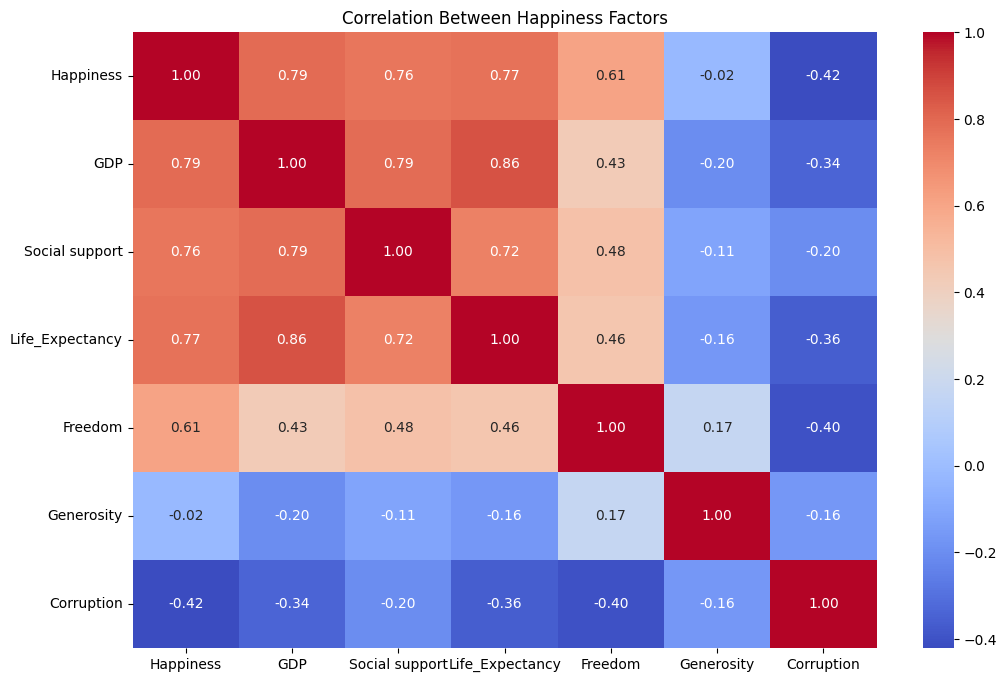

In [10]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Happiness Factors")
plt.show()

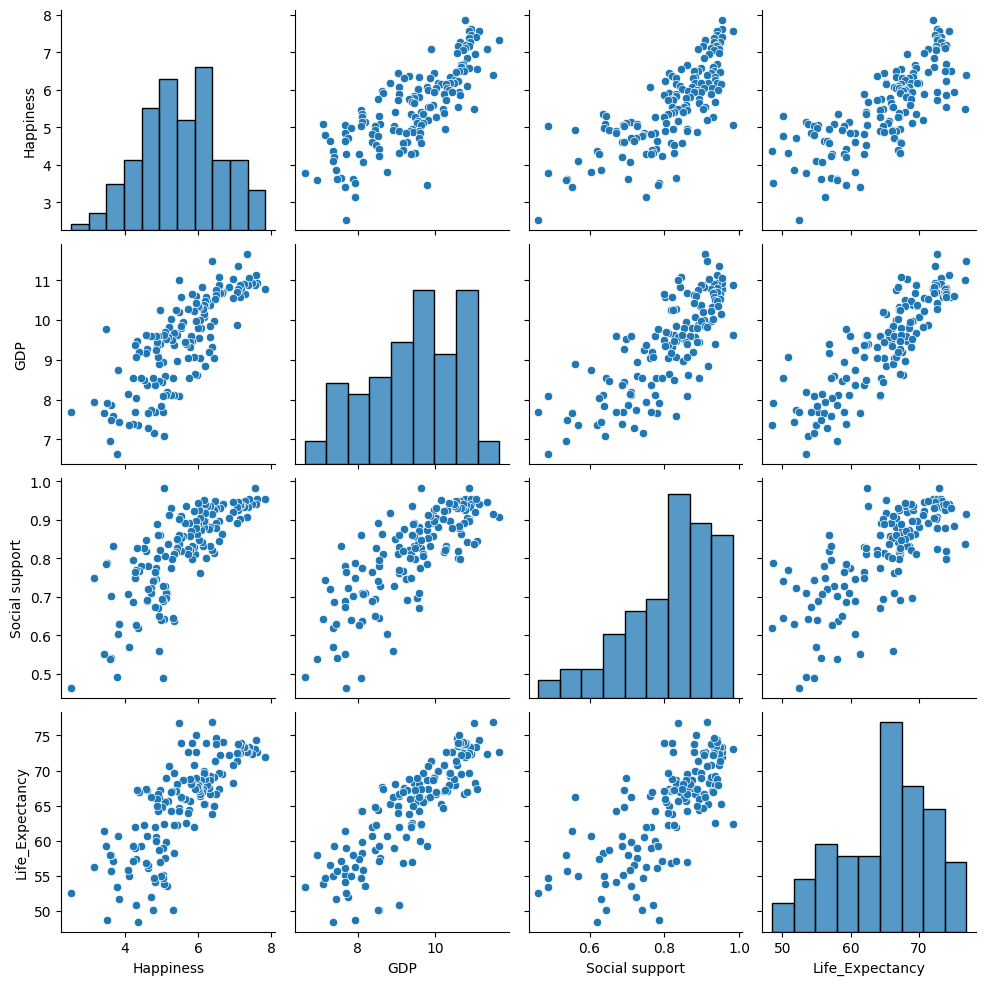

In [11]:
sns.pairplot(df[['Happiness', 'GDP', 'Social support', 'Life_Expectancy']])
plt.show()

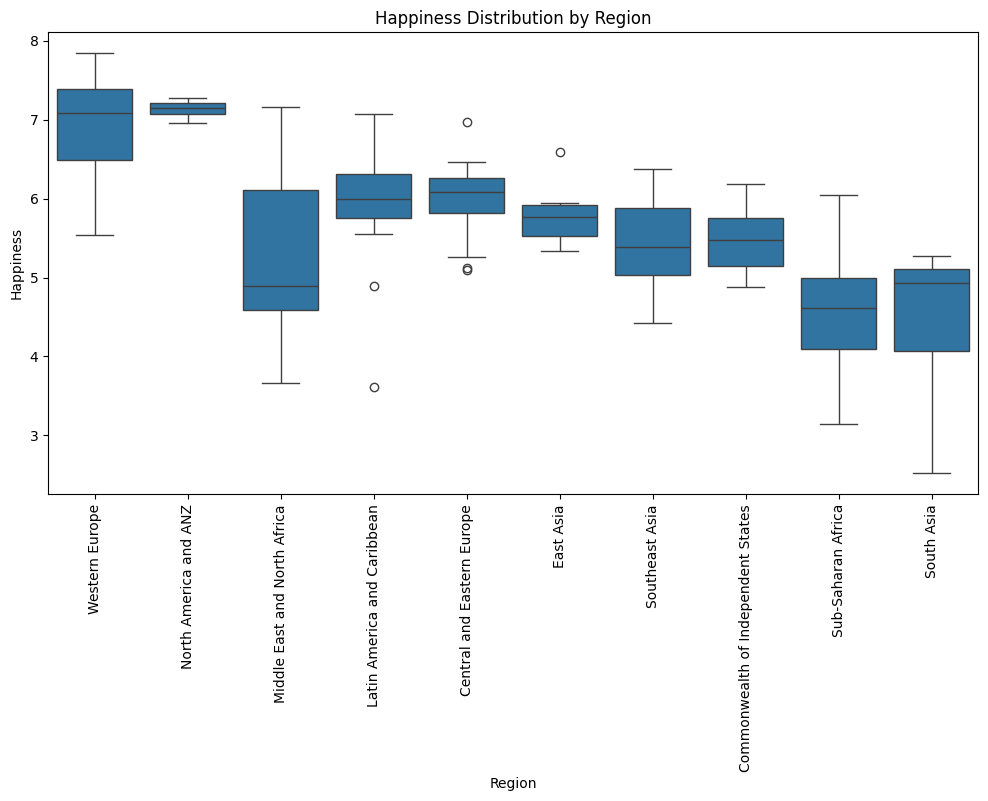

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Happiness', data=df)
plt.xticks(rotation=90)
plt.title("Happiness Distribution by Region")
plt.show()

# Interactive Plot
Note that locations with grey color is not included in the dataset

In [13]:
fig = px.choropleth(
    df,
    locations="Country",
    locationmode="country names",
    color="Happiness",
    hover_name="Country",
    title="World Happiness Map",
    color_continuous_scale=px.colors.sequential.Plasma
)
fig.show()

# Insights
- GDP, Social Support, and Life Expectancy  have the highest correlation with happiness.
- Happiest countries are (Finland, Denmark)
- Saddest countries are (Afghanistan, Zimbabwe)


# Multivariate Analysis

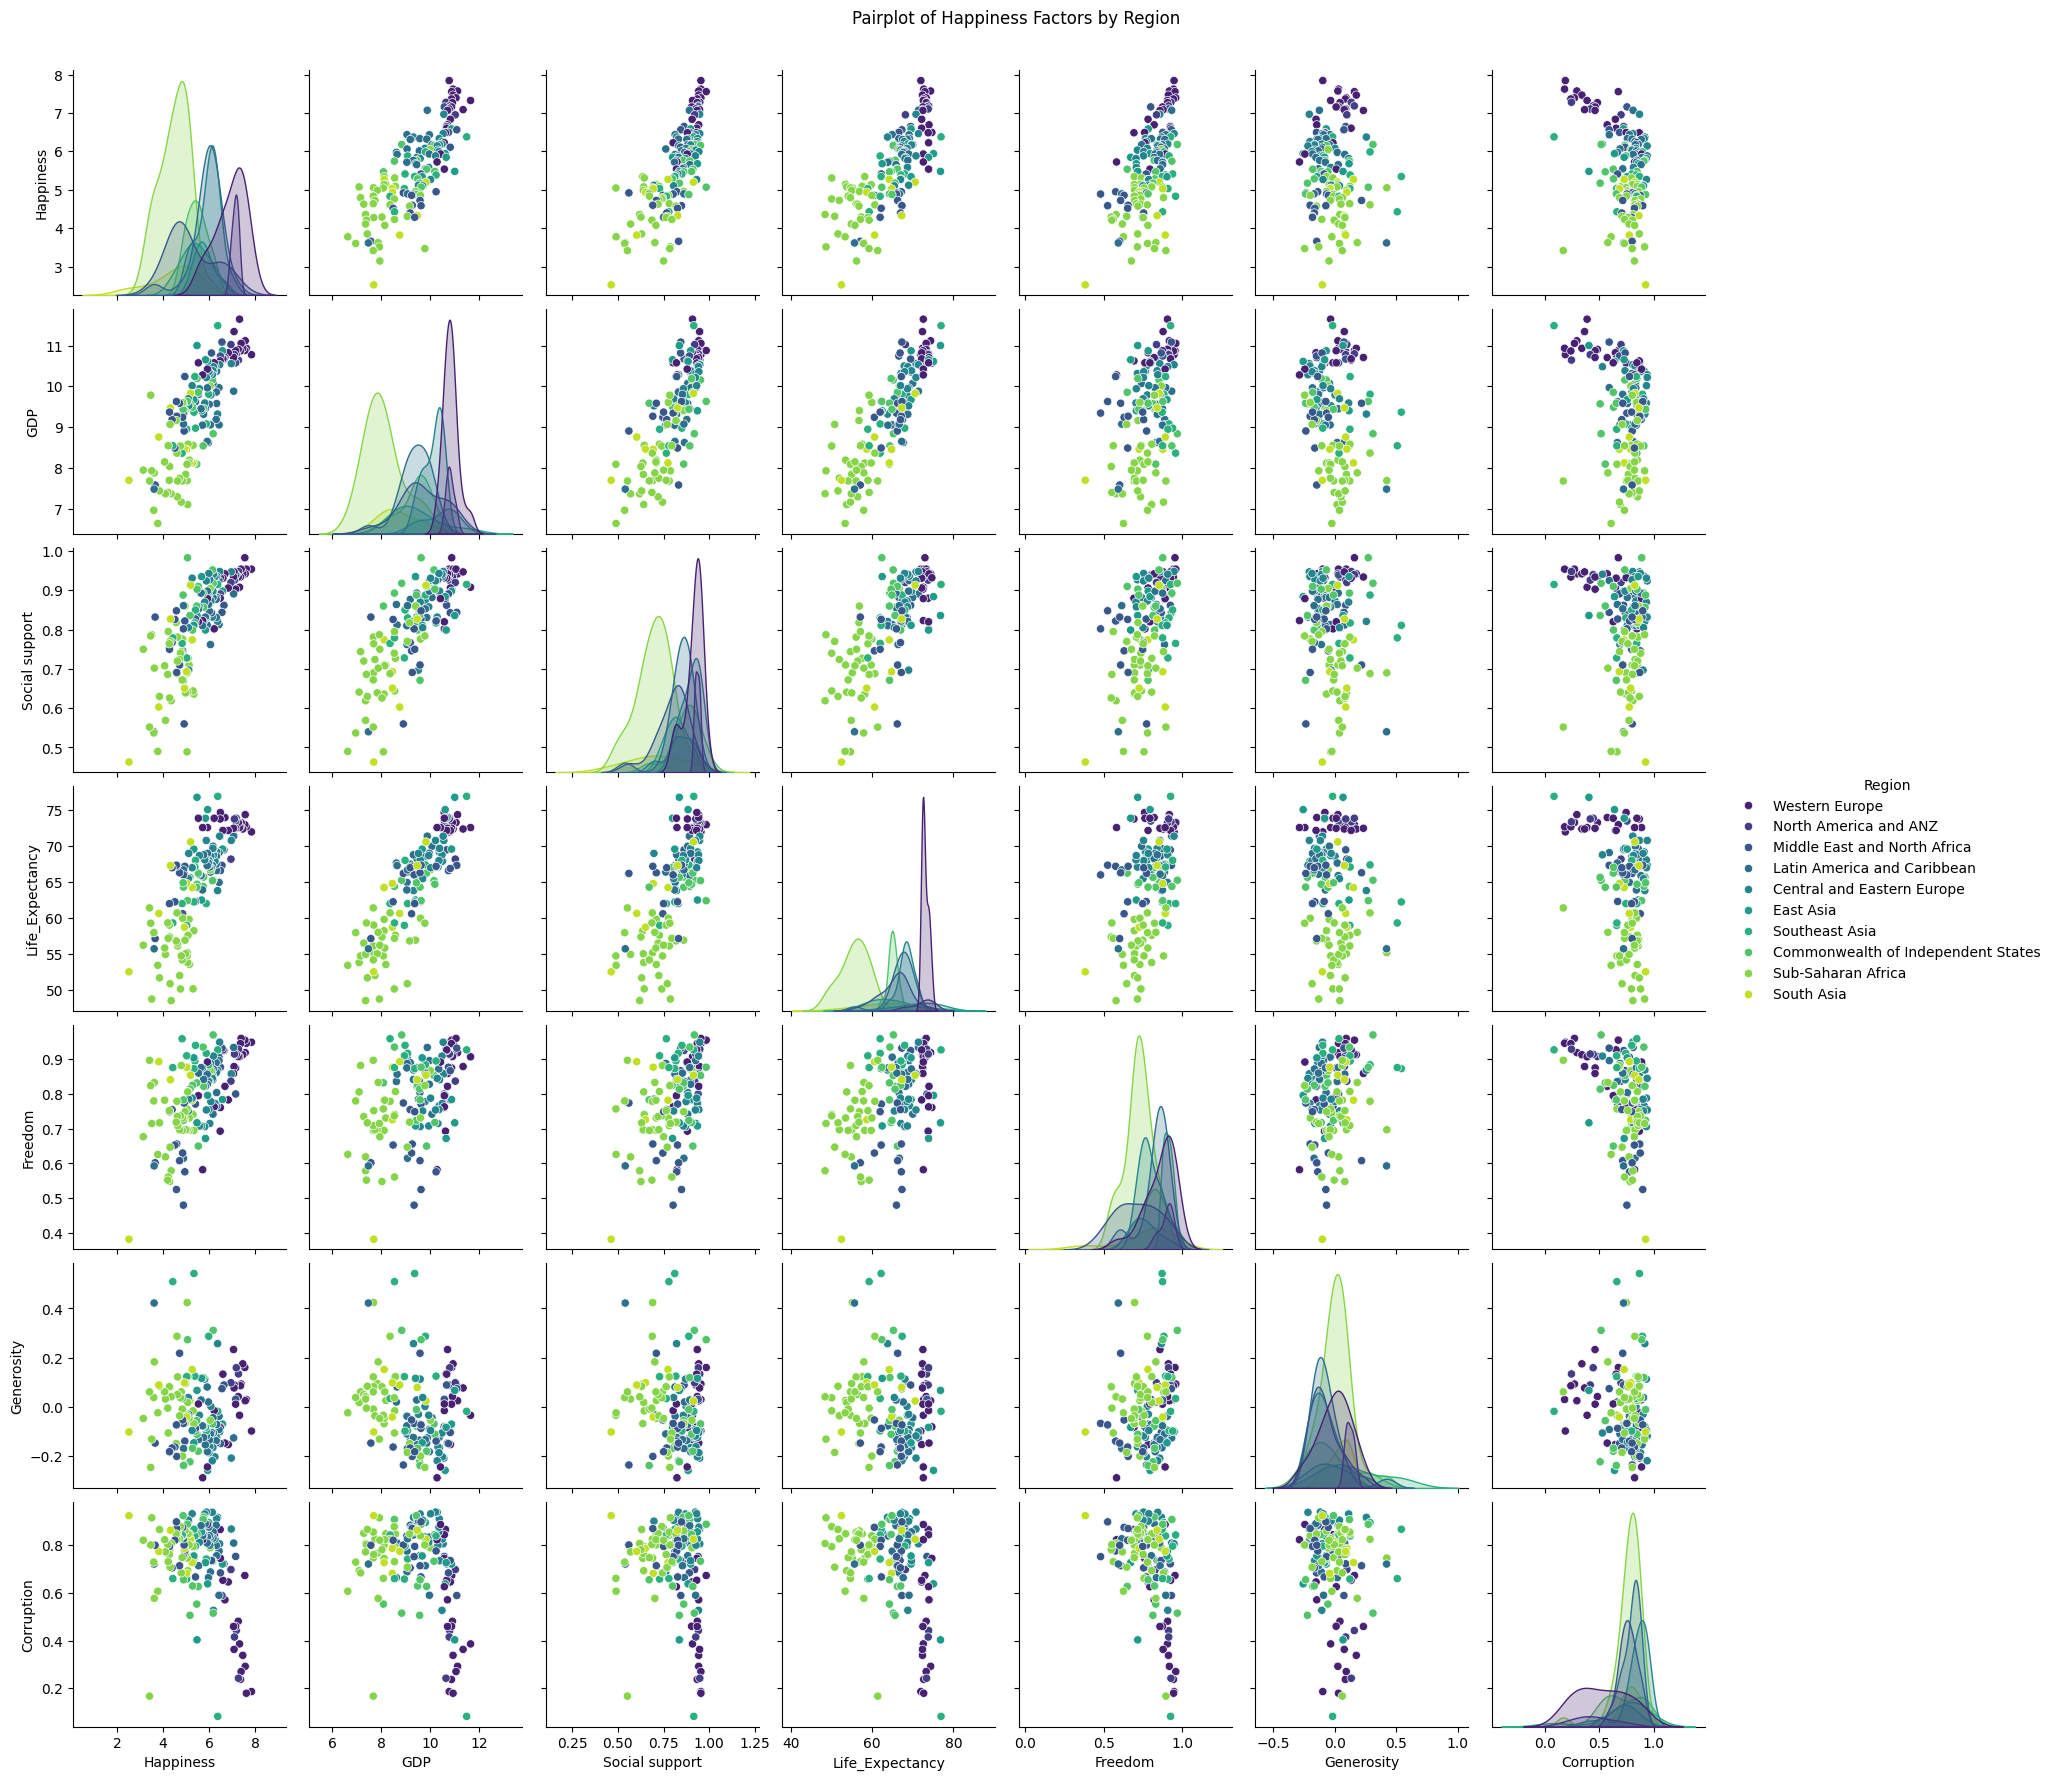

In [14]:
sns.pairplot(df, hue='Region', palette='viridis')
plt.suptitle("Pairplot of Happiness Factors by Region", y=1.02)
plt.show()

In [15]:
num_cols = ['Happiness', 'GDP', 'Social support', 'Life_Expectancy', 'Freedom']
fig = px.scatter_matrix(
    df,
    dimensions=num_cols,
    color="Region",
    hover_name="Country",
    title="Pair Plot of Happiness Indicators"
)
fig.show()

In [16]:
fig = px.scatter_3d(
    df,
    x='GDP',
    y='Social support',
    z='Happiness',
    color='Region',
    hover_name='Country',
    title="Happiness vs. GDP & Social Support (3D)"
)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=30))
fig.show()

In [18]:
fig = px.scatter(
    df,
    x="GDP",
    y="Happiness",
    size="Life_Expectancy",
    color="Region",
    hover_name="Country",
    size_max=20,
    title="Click legend to highlight regions"
)

fig.update_layout(
    clickmode='event+select',
    height=600
)

fig.show()